In [198]:
import pandas as pd
import numpy as np
from scipy import signal, misc
from datetime import datetime, timedelta

import os
import json

In [199]:
#loading sensor information from Ascendo and Promethean DB
prom_data=pd.read_csv("Device_200011546604332_2019_09_21.csv")
pdf=pd.DataFrame({
    'timestamp':prom_data.TableTimeStamp,
    'milk_temp':prom_data.Parameter2,
    'tank_switch':prom_data.Parameter11,
    'agitator':prom_data.Parameter12,
    'discharge_pump':prom_data.Parameter15,
    'compressor':prom_data.Parameter6,
    'ac_voltage':prom_data.Parameter5,
    'pump_current':prom_data.Parameter7,
    'tss_temp':prom_data.Parameter1
})
ascendo_data=pd.read_csv("Ascendo_200011546604332_2019_09_21.csv")

Promethean Data

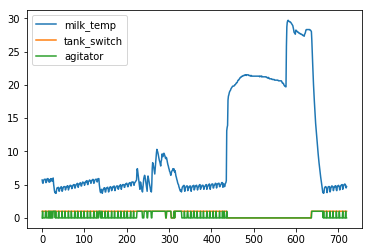

In [200]:
pdf[['milk_temp','tank_switch','agitator']].plot()

Ascendo Data

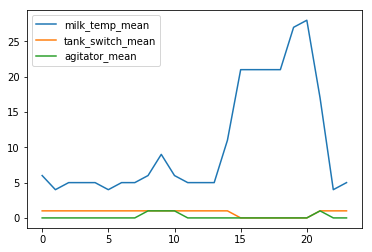

In [201]:
ascendo_data[['milk_temp_mean','tank_switch_mean','agitator_mean']].plot()

# Detecting Milk Present

In [202]:
#life events    
def milk_present(milk_temp_mean):
    if int(milk_temp_mean) in range(12,20): #no product
        return 0
    elif milk_temp_mean in range(25, 35): #fresh product poured in
        return 2
    else:
        return 1
    
def create_life_events(new_df):
    
    new_df['milk_present']=new_df['milk_temp_mean'].apply(milk_present)

    tdf=pd.DataFrame(new_df,columns=['timestamp','milk_present','milk_temp_mean'])
    print(tdf)

    
    
life_events= create_life_events(ascendo_data)   

              timestamp  milk_present  milk_temp_mean
0   2019-09-21 00:00:00             1               6
1   2019-09-21 01:00:00             1               4
2   2019-09-21 02:00:00             1               5
3   2019-09-21 03:00:00             1               5
4   2019-09-21 04:00:00             1               5
5   2019-09-21 05:00:00             1               4
6   2019-09-21 06:00:00             1               5
7   2019-09-21 07:00:00             1               5
8   2019-09-21 08:00:00             1               6
9   2019-09-21 09:00:00             1               9
10  2019-09-21 10:00:00             1               6
11  2019-09-21 11:00:00             1               5
12  2019-09-21 12:00:00             1               5
13  2019-09-21 13:00:00             1               5
14  2019-09-21 14:00:00             1              11
15  2019-09-21 15:00:00             1              21
16  2019-09-21 16:00:00             1              21
17  2019-09-21 17:00:00     

# ERROR AT 2:00pm

The temperature went upto 11 but the milk present status is still 1 and only changes to 2 at 7:00pm when fresh milk was poured in (which holds true)

In [203]:
   
def milk_present(milk_temp_mean):
    if int(milk_temp_mean) in range(10,25): #no product!!!!! Made changes here
        return 0
    elif milk_temp_mean in range(25, 35): #fresh product poured in
        return 2
    else:
        return 1
    
def create_life_events(new_df):
    
    new_df['milk_present']=new_df['milk_temp_mean'].apply(milk_present)
    tdf=pd.DataFrame(new_df,columns=['timestamp','milk_present','milk_temp_mean'])
    print(tdf)

   
life_events= create_life_events(ascendo_data)   

              timestamp  milk_present  milk_temp_mean
0   2019-09-21 00:00:00             1               6
1   2019-09-21 01:00:00             1               4
2   2019-09-21 02:00:00             1               5
3   2019-09-21 03:00:00             1               5
4   2019-09-21 04:00:00             1               5
5   2019-09-21 05:00:00             1               4
6   2019-09-21 06:00:00             1               5
7   2019-09-21 07:00:00             1               5
8   2019-09-21 08:00:00             1               6
9   2019-09-21 09:00:00             1               9
10  2019-09-21 10:00:00             1               6
11  2019-09-21 11:00:00             1               5
12  2019-09-21 12:00:00             1               5
13  2019-09-21 13:00:00             1               5
14  2019-09-21 14:00:00             0              11
15  2019-09-21 15:00:00             0              21
16  2019-09-21 16:00:00             0              21
17  2019-09-21 17:00:00     

Creating another index for when milk is lifted

milk_present=3 indicates that milk was just lifted

In [204]:
def milk_present(milk_temp_mean):
    if int(milk_temp_mean) in range(10,25): #no product!!!!! Made changes here
        return 0
    elif milk_temp_mean in range(25, 35): #fresh product poured in
        return 2
    else:
        return 1
    
def create_life_events(new_df):
    
    new_df['milk_present']=new_df['milk_temp_mean'].apply(milk_present)
    new_val=[]
    i=0
    for row in new_df.milk_present:
        if (new_df.milk_present.iloc[i-1]==1)&(row==0):
            new_val.append(3)
        else:
            new_val.append(row)
        i=i+1
    new_df['milk_present']=new_val      
    tdf=pd.DataFrame(new_df,columns=['timestamp','milk_present','milk_temp_mean'])
    print(tdf)

   
life_events= create_life_events(ascendo_data)

              timestamp  milk_present  milk_temp_mean
0   2019-09-21 00:00:00             1               6
1   2019-09-21 01:00:00             1               4
2   2019-09-21 02:00:00             1               5
3   2019-09-21 03:00:00             1               5
4   2019-09-21 04:00:00             1               5
5   2019-09-21 05:00:00             1               4
6   2019-09-21 06:00:00             1               5
7   2019-09-21 07:00:00             1               5
8   2019-09-21 08:00:00             1               6
9   2019-09-21 09:00:00             1               9
10  2019-09-21 10:00:00             1               6
11  2019-09-21 11:00:00             1               5
12  2019-09-21 12:00:00             1               5
13  2019-09-21 13:00:00             1               5
14  2019-09-21 14:00:00             3              11
15  2019-09-21 15:00:00             0              21
16  2019-09-21 16:00:00             0              21
17  2019-09-21 17:00:00     

In [205]:
def milk_edgecase(milk_temp_mean):
    if int(milk_temp_mean) in range(4,6): #safe temperature
        return 0
    elif milk_temp_mean >6: #OVER upperbound - hotter product
        return 1
    else: #BELOW lowerbound - cold product
        return 2
    
def milk_present(milk_temp_mean):
    if int(milk_temp_mean) in range(10,25): #no product!!!!! Made changes here
        return 0
    elif milk_temp_mean in range(25, 35): #fresh product poured in
        return 2
    else:
        return 1
    
def create_life_events(new_df):
    
    new_df['milk_present']=new_df['milk_temp_mean'].apply(milk_present)
    new_df['milk_temp_edgecase']=new_df['milk_temp_mean'].apply(milk_edgecase)
    
    milk_temp_edgecase=[]
    count1=0 #counters to check for more than 3 hours scenario
    count2=0
    for t in new_df.milk_temp_edgecase:
        if (t==1):
            count1=count1+1
            if count1>=3:
                milk_temp_edgecase.append(1)
            else:
                count2=0
                milk_temp_edgecase.append(0)
        elif (t==2):
            count2=count2+1
            if count2==3:
                milk_temp_edgecase.append(2)
            else:
                count1=0
                milk_temp_edgecase.append(0)
        else:
            count2=0 #resetting counters becz nthn happened
            count1=0 
            milk_temp_edgecase.append(0)
            
    new_df['milk_temp_edgecase']=milk_temp_edgecase
    #print(new_df.head())
    
    cooling_process=[]
    #tank switch on and doscharge pump on
    for row in new_df.iterrows():

        if (row[1][7]!=0.0) &(row[1][9]!=0.0):
            cooling_process.append(1) #cooling process in process
        else:
            cooling_process.append(0) 
    new_df['cooling']=cooling_process

    #creatn empty list to fill values into device_life_events table
    datetimelist=[]
    event_id=[]
    print(new_df.shape)
    
    return new_df


   
life_events= create_life_events(ascendo_data)  
new_df= create_life_events(ascendo_data)


(24, 23)
(24, 23)


In [206]:
life_events=life_events.drop(labels=['serial_number','id','device_id','room_temp1_mean','room_temp2_mean','dc_voltage_mean','n_obs'
                         ,'created_by','created_on','updated_by','updated_on',
                        'compressor_mean','pump_current_mean','tss_temp_mean','agitator_mean'],axis=1)
life_events
new_df.shape

(24, 23)

# Incidents

In [207]:
print(new_df)

def make_incident(new_df):
    incident_id =[]

    priority=[]
    incident_time=[]
    i=0
    count_1=0
    print(new_df.shape)
    for t in new_df.iterrows():
        # milk_present==1  AND milk_temp_edgecase ==1 AND AC_voltage not in range
        if (t[1][20] ==1 & t[1][21]==1) & (int(t[1][11]) not in range(180, 260)):  #incident 1
                    incident_id.append(1)
                    priority.append('High')
                    incident_time.append(t[1][15])
        if (t[1][20] ==1 & t[1][21]==1) & (t[1][9]==0):  #incident 2
                    incident_id.append(2)
                    priority.append('High')
                    incident_time.append(t[1][15])           

        # milk_present==1  AND milk_temp_edgecase ==1 AND AC_voltage in range AND tank_switch==0
        if (t[1][20] ==1 & t[1][21]==1) & (int(t[1][11]) in range(180, 260)) &(t[1][7]==0): #incident 3
                    incident_id.append(3)
                    priority.append('Critical')
                    incident_time.append(t[1][15])

        # milk_present==1  AND milk_temp_edgecase ==1 AND AC_voltage in range AND cooling=0
        if (t[1][20] ==1 & t[1][21]==1) & (int(t[1][11]) in range(180, 260)) & (t[1][13]==0):  #incident 4
                    incident_id.append(4)
                    priority.append('Critical')
                    incident_time.append(t[1][15])

        # milk_present==1  AND tank_switch=0
        if (t[1][20] ==0) & ( t[1][7]==1): #incident 5
                    incident_id.append(5)
                    priority.append('High')
                    incident_time.append(t[1][15])

        # milk_present==1  AND milk_temp_edgecase ==1 AND AC_voltage in range AND cooling=0
        if (t[1][20] ==2) &(t[1][22]==1):
                    incident_id.append(10)
                    priority.append('Normal')
                    incident_time.append(t[1][15])

    df=pd.DataFrame({

            'incident_id':incident_id,
            'priority':priority,
            'timestamp':incident_time,

    })
            
    
    print('Created Incidents','='*70)
    
    return df


incidents=make_incident(new_df)
incidents

        id  device_id    serial_number  milk_temp_mean  room_temp1_mean  \
0   112689         29  200011512628130               6              NaN   
1   112690         29  200011512628130               4              NaN   
2   112691         29  200011512628130               5              NaN   
3   112692         29  200011512628130               5              NaN   
4   112693         29  200011512628130               5              NaN   
5   112694         29  200011512628130               4              NaN   
6   112695         29  200011512628130               5              NaN   
7   112696         29  200011512628130               5              NaN   
8   112697         29  200011512628130               6              NaN   
9   112698         29  200011512628130               9              NaN   
10  112699         29  200011512628130               6              NaN   
11  112700         29  200011512628130               5              NaN   
12  112701         29  20

,incident_id,priority,timestamp
0,5,High,2019-09-21 14:00:00
1,5,High,2019-09-21 21:00:00
